<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

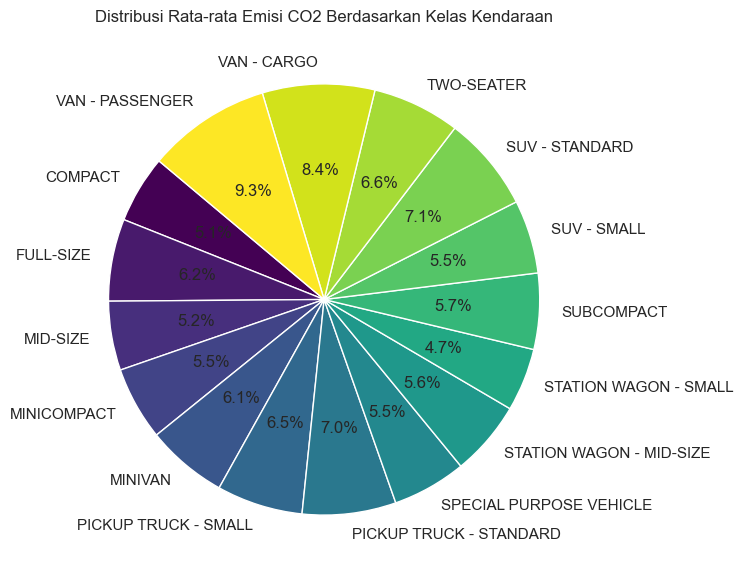

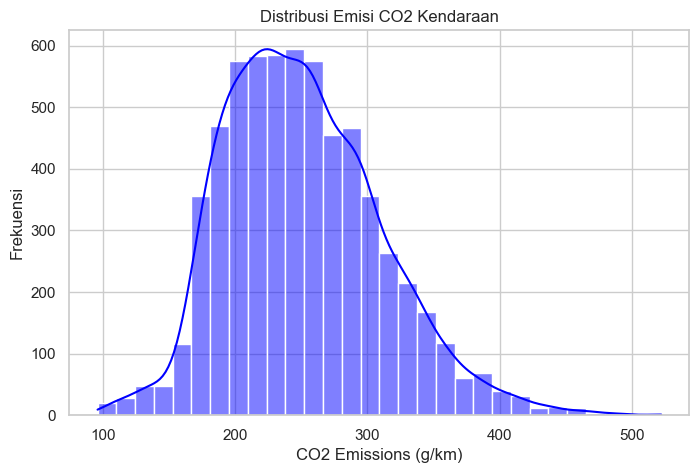

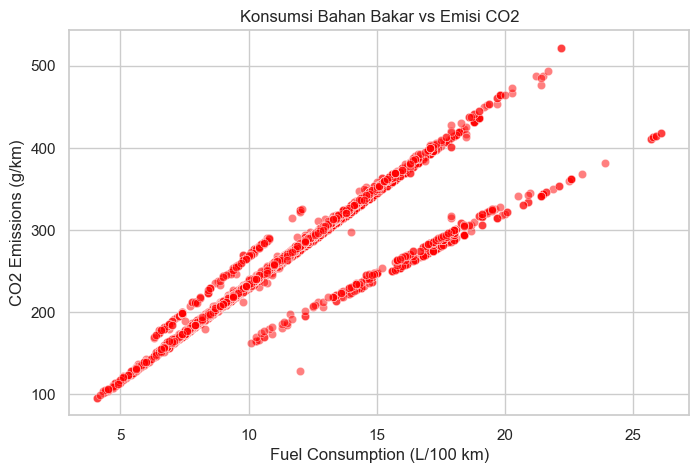

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11656\624182549.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_co2_per_class, y=avg_co2_per_class.index, palette="viridis")


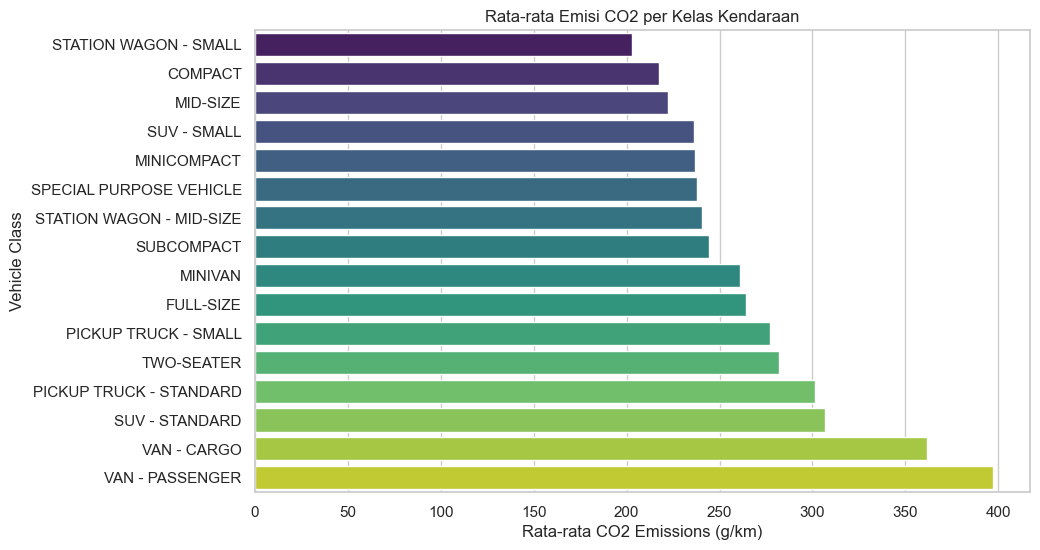

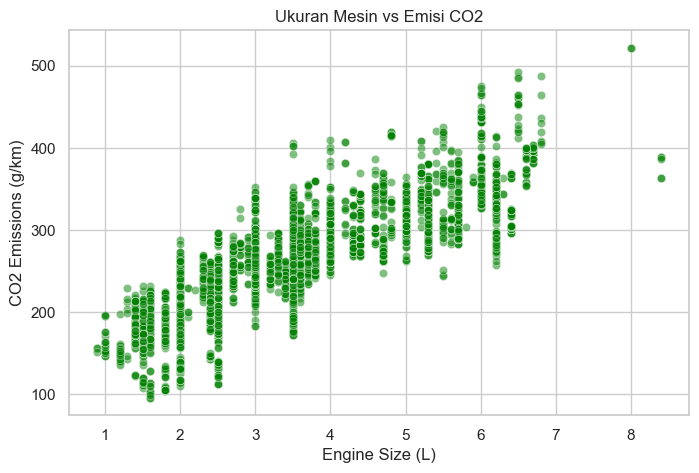

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11656\624182549.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_co2_per_fuel, y=avg_co2_per_fuel.index, palette="magma")


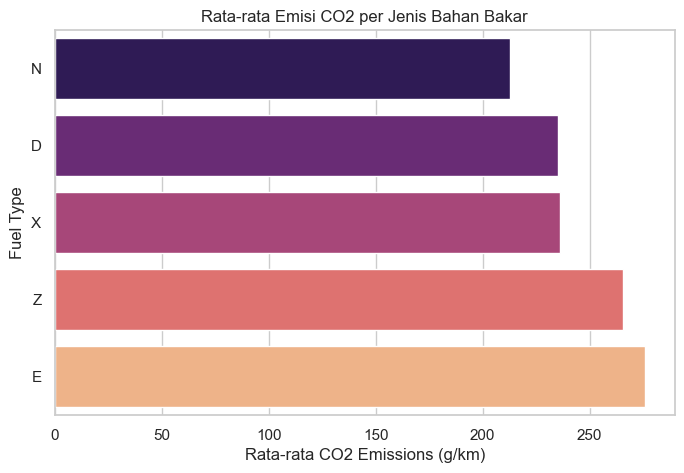

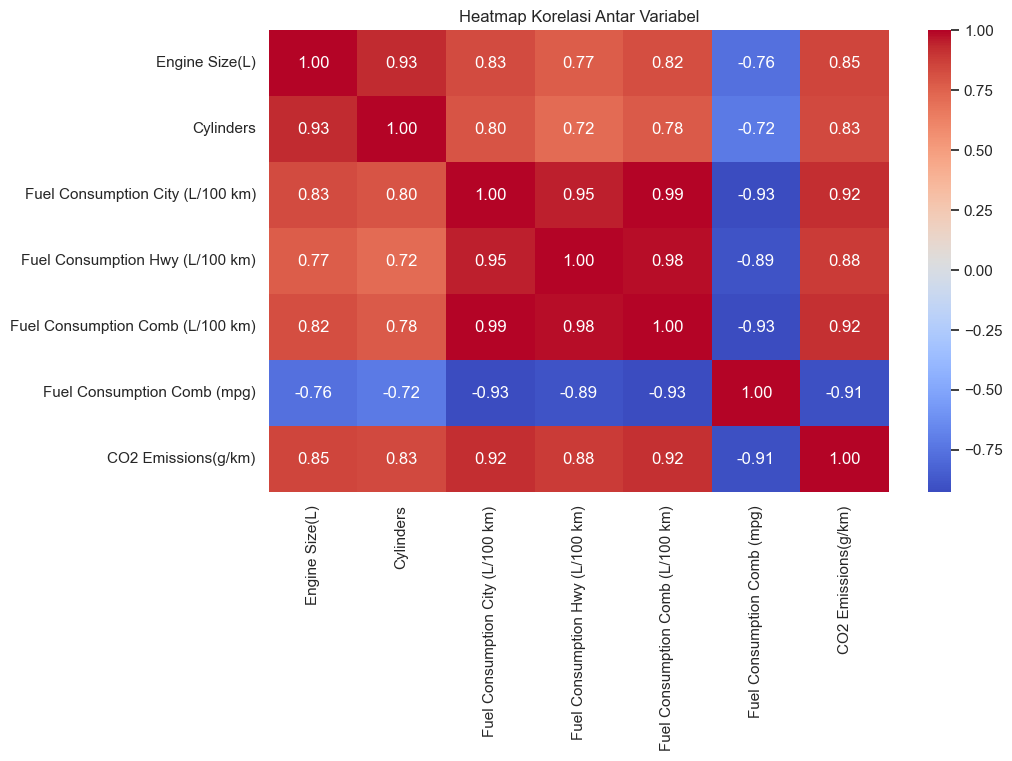

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11656\624182549.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_co2["Transmission"], y=df_co2["CO2 Emissions(g/km)"], palette="Set2")


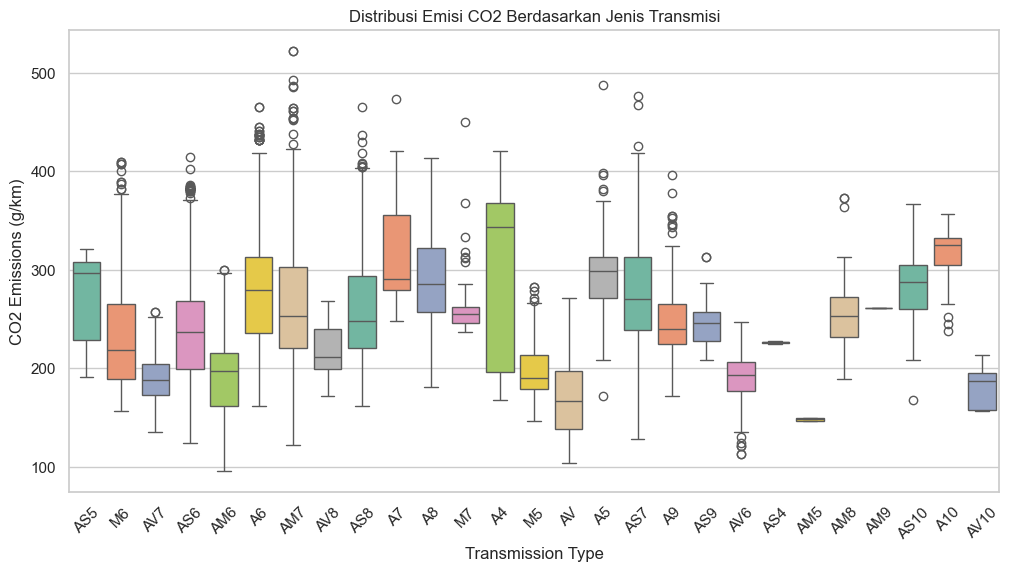

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11656\624182549.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_co2_makes, y=lowest_co2_makes.index, palette="Greens_r")


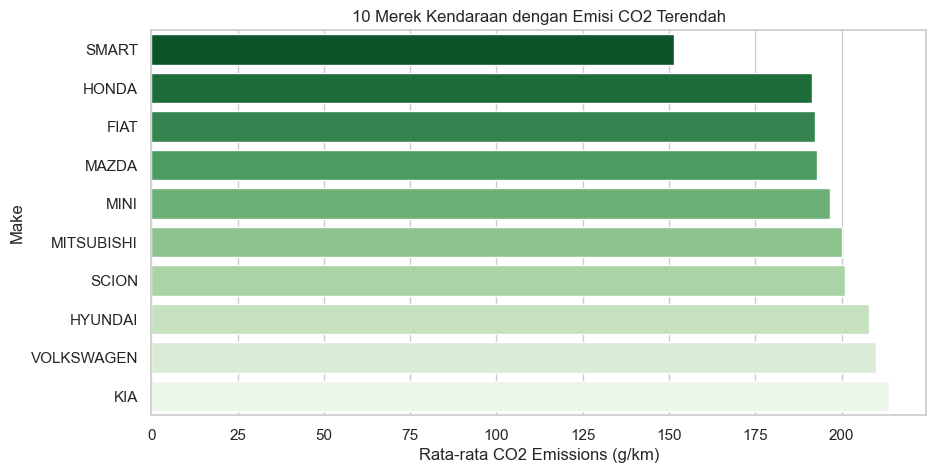

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11656\624182549.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_co2_makes, y=highest_co2_makes.index, palette="Reds_r")


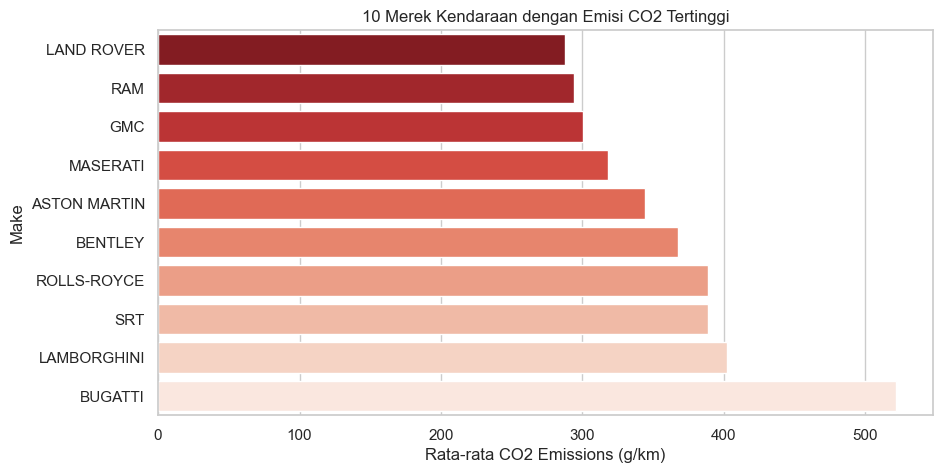

RMSE setelah transformasi: 110389169.66


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure pandas is imported
import pandas as pd

df_co2 = pd.read_csv(r"C:\Users\Infinix X2\Documents\SEMESTER 8\Data Science\DATASET\co2.csv")
df_co2

df_co2.info()
df_co2.describe()

# Drop duplicate rows across all columns
df_co2 = df_co2.drop_duplicates()

# Drop rows with missing data across all columns
df_co2 = df_co2.dropna()

df_co2


df_co2.info()
df_co2.describe()
# Pie chart distribusi rata-rata emisi CO2 berdasarkan kelas kendaraan
avg_co2_per_class = df_co2.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean()
plt.figure(figsize=(10,7))
avg_co2_per_class.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title("Distribusi Rata-rata Emisi CO2 Berdasarkan Kelas Kendaraan")
plt.ylabel("")  # Menghapus label default pada sumbu y
plt.show()
# Set style untuk seaborn
sns.set_theme(style="whitegrid")

# 1. Histogram distribusi CO2 Emissions
plt.figure(figsize=(8,5))
sns.histplot(df_co2["CO2 Emissions(g/km)"], bins=30, kde=True, color="blue")
plt.title("Distribusi Emisi CO2 Kendaraan")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frekuensi")
plt.show()

# 2. Scatter plot Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_co2["Fuel Consumption Comb (L/100 km)"], y=df_co2["CO2 Emissions(g/km)"], alpha=0.5, color="red")
plt.title("Konsumsi Bahan Bakar vs Emisi CO2")
plt.xlabel("Fuel Consumption (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# 3. Bar chart rata-rata emisi CO2 berdasarkan kelas kendaraan
plt.figure(figsize=(10,6))
avg_co2_per_class = df_co2.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean().sort_values()
sns.barplot(x=avg_co2_per_class, y=avg_co2_per_class.index, palette="viridis")
plt.title("Rata-rata Emisi CO2 per Kelas Kendaraan")
plt.xlabel("Rata-rata CO2 Emissions (g/km)")
plt.ylabel("Vehicle Class")
plt.show()

# 4. Scatter plot Engine Size vs CO2 Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_co2["Engine Size(L)"], y=df_co2["CO2 Emissions(g/km)"], alpha=0.5, color="green")
plt.title("Ukuran Mesin vs Emisi CO2")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# 5. Bar chart Emisi CO2 berdasarkan jenis bahan bakar
plt.figure(figsize=(8,5))
avg_co2_per_fuel = df_co2.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values()
sns.barplot(x=avg_co2_per_fuel, y=avg_co2_per_fuel.index, palette="magma")
plt.title("Rata-rata Emisi CO2 per Jenis Bahan Bakar")
plt.xlabel("Rata-rata CO2 Emissions (g/km)")
plt.ylabel("Fuel Type")
plt.show()

# 1. Heatmap Korelasi Antar Variabel Numerik
plt.figure(figsize=(10,6))
correlation_matrix = df_co2.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# 2. Boxplot Emisi CO2 berdasarkan Jenis Transmisi
plt.figure(figsize=(12,6))
sns.boxplot(x=df_co2["Transmission"], y=df_co2["CO2 Emissions(g/km)"], palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribusi Emisi CO2 Berdasarkan Jenis Transmisi")
plt.xlabel("Transmission Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# 3. Merek Kendaraan dengan Emisi CO2 Terendah dan Tertinggi
avg_co2_per_make = df_co2.groupby("Make")["CO2 Emissions(g/km)"].mean().sort_values()
lowest_co2_makes = avg_co2_per_make.head(10)  # 10 Merek dengan Emisi Terendah
highest_co2_makes = avg_co2_per_make.tail(10) # 10 Merek dengan Emisi Tertinggi

# Plot 10 merek dengan emisi CO2 terendah
plt.figure(figsize=(10,5))
sns.barplot(x=lowest_co2_makes, y=lowest_co2_makes.index, palette="Greens_r")
plt.title("10 Merek Kendaraan dengan Emisi CO2 Terendah")
plt.xlabel("Rata-rata CO2 Emissions (g/km)")
plt.ylabel("Make")
plt.show()

# Plot 10 merek dengan emisi CO2 tertinggi
plt.figure(figsize=(10,5))
sns.barplot(x=highest_co2_makes, y=highest_co2_makes.index, palette="Reds_r")
plt.title("10 Merek Kendaraan dengan Emisi CO2 Tertinggi")
plt.xlabel("Rata-rata CO2 Emissions (g/km)")
plt.ylabel("Make")
plt.show()

# Deteksi dan hapus outlier pada fitur numerik
numerical_features = ['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)']
for col in numerical_features:
    Q1 = df_co2[col].quantile(0.25)
    Q3 = df_co2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_co2 = df_co2[(df_co2[col] >= lower) & (df_co2[col] <= upper)]
df_co2 = df_co2.drop(['Fuel Consumption Comb (mpg)', 'Model'], axis=1)
df_co2 = pd.get_dummies(df_co2, columns=['Make', 'Vehicle Class', 'Transmission', 'Fuel Type'])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
df_co2[numerical_cols] = scaler.fit_transform(df_co2[numerical_cols])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_co2.drop('CO2 Emissions(g/km)', axis=1)
y = df_co2['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE setelah transformasi: {rmse:.2f}')

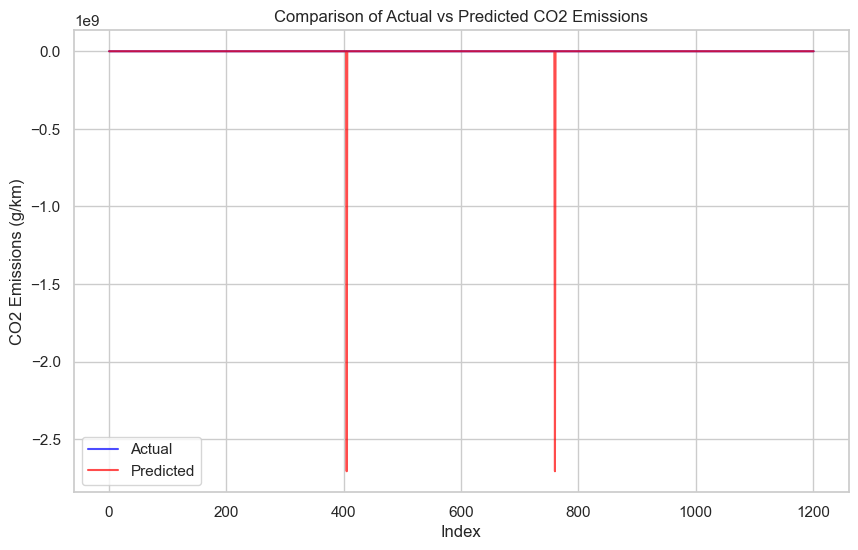

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Comparison of Actual vs Predicted CO2 Emissions')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()